# Email Classification using Natural Language Processing

## Problem Statement

We're given a dataset that contains some message and it's labelled as spam and not spam. 

**Importing Pyhton Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the training data using pandas**

In [2]:
train_df = pd.read_csv('data/SMS_train.csv', encoding = 'cp1252')

In [3]:
train_df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [4]:
train_df = train_df.drop('S. No.', axis=1)

**Checking for any missing data**

In [5]:
train_df.isna().sum()

Message_body    0
Label           0
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

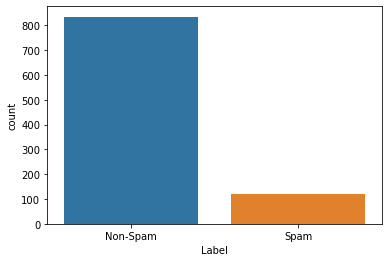

In [6]:
sns.countplot(data=train_df, x='Label')

**Reading the testing data**

In [7]:
test_df = pd.read_csv('data/SMS_test.csv', encoding = 'cp1252')

In [8]:
test_df.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [9]:
test_df = test_df.drop('S. No.', axis=1)

In [10]:
test_df.isna().sum()

Message_body    0
Label           0
dtype: int64

**Splitting the datasets into X_train, X_test, y_train, y_test**

In [11]:
X_train = train_df['Message_body']
X_test = test_df['Message_body']

In [12]:
y_train = train_df['Label']
y_test = test_df['Label']

**Here, I use TfidfVectorizer that does the work of CountVectorizer and TfidfTransformer. TfidfVectorizer considers the overall document weightage of a word. It helps in dealing with most frequent words. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words='english')

In [15]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [16]:
X_test_tfidf = tfidf.transform(X_test)

**Here I use the Linear Support Vector Classification model**

In [17]:
from sklearn.svm import LinearSVC

**Here, I've adjusted the hyperparameters to improve the accuracy score**

In [18]:
model = LinearSVC(C=3, max_iter=10000)

In [19]:
model.fit(X_train_tfidf, y_train)

LinearSVC(C=3, max_iter=10000)

In [20]:
preds = model.predict(X_test_tfidf)

**I make predictions and then check its accuracy score using the classsification report and the confusion matrix**

In [21]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [22]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    Non-Spam       0.80      1.00      0.89        49
        Spam       1.00      0.84      0.91        76

    accuracy                           0.90       125
   macro avg       0.90      0.92      0.90       125
weighted avg       0.92      0.90      0.91       125



/Users/glenquadros/opt/anaconda3/envs/New_Environment/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


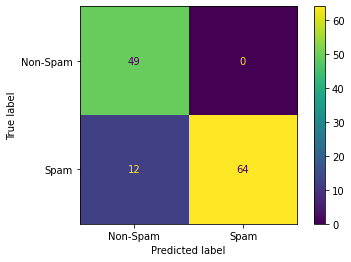

In [23]:
plot_confusion_matrix(model, X_test_tfidf, y_test)